In [19]:
import pandas as pd
import seaborn as sns
from seaborn import displot
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import numpy as np
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
import base64
import requests as rq
import json
from datetime import date


# Arbol de Decision
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Matriz de Confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df = pd.read_csv('idealista_zaragoza_2024-09-06.csv')


In [21]:
df

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,newDevelopmentFinished
0,105157805,https://img4.idealista.com/blur/WEB_LISTING/0/...,CATOLICO 250,67,7,250000.0,"{'price': {'amount': 250000.0, 'currencySuffix...",flat,sale,113.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,105832061,https://img4.idealista.com/blur/WEB_LISTING/0/...,CLA195,35,3,195000.0,"{'price': {'amount': 195000.0, 'currencySuffix...",flat,sale,65.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN
2,105447275,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,50,en,220000.0,"{'price': {'amount': 220000.0, 'currencySuffix...",flat,sale,148.0,...,"{'subtitle': 'Universidad San Francisco, Zarag...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,104623253,https://img4.idealista.com/blur/WEB_LISTING/0/...,NaN,46,2,236000.0,"{'price': {'amount': 236000.0, 'currencySuffix...",flat,sale,156.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,105341044,https://img4.idealista.com/blur/WEB_LISTING/0/...,LALUZ160,31,bj,160000.0,"{'price': {'amount': 160000.0, 'currencySuffix...",flat,sale,66.0,...,"{'subtitle': 'Ruiseñores, Zaragoza', 'title': ...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,104227046,NaN,NaN,0,2,69000.0,"{'price': {'amount': 69000.0, 'currencySuffix'...",flat,sale,60.0,...,"{'subtitle': 'La Magdalena, Zaragoza', 'title'...",False,False,False,False,NaN,False,False,NaN,NaN
1533,105357466,NaN,19923,0,NaN,34424.0,"{'price': {'amount': 34424.0, 'currencySuffix'...",flat,sale,56.0,...,"{'subtitle': 'Las Fuentes, Zaragoza', 'title':...",False,False,False,False,NaN,False,False,NaN,NaN
1534,105357892,NaN,19422,0,NaN,52728.0,"{'price': {'amount': 52728.0, 'currencySuffix'...",flat,sale,61.0,...,"{'subtitle': 'Mercado San Valero, Zaragoza', '...",False,False,False,False,NaN,False,False,NaN,NaN
1535,105440136,NaN,25148,0,NaN,51783.0,"{'price': {'amount': 51783.0, 'currencySuffix'...",flat,sale,79.0,...,"{'subtitle': 'Pinares de Venecia, Zaragoza', '...",False,False,False,False,NaN,False,False,NaN,NaN


In [22]:
# Crear un diccionario para mapear los nombres actuales a los nombres en español (sin acentos)
column_mapping = {
    'propertyCode': 'CodigoPropiedad',
    'thumbnail': 'MiniaturaURL',
    'numPhotos': 'NumeroFotos',
    'floor': 'Piso',
    'price': 'Precio',
    'priceInfo': 'InformacionPrecio',
    'propertyType': 'TipoPropiedad',
    'operation': 'Operacion',
    'size': 'Tamano',
    'exterior': 'Exterior',
    'rooms': 'Habitaciones',
    'bathrooms': 'Banos',
    'address': 'Direccion',
    'province': 'Provincia',
    'municipality': 'Municipio',
    'district': 'Distrito',
    'country': 'Pais',
    'neighborhood': 'Barrio',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'showAddress': 'MostrarDireccion',
    'url': 'URL',
    'distance': 'Distancia',
    'description': 'Descripcion',
    'hasVideo': 'TieneVideo',
    'status': 'Estado',
    'newDevelopment': 'NuevaConstruccion',
    'hasLift': 'TieneAscensor',
    'priceByArea': 'PrecioPorMetroCuadrado',
    'detailedType': 'TipoDetallado',
    'suggestedTexts': 'TextosSugeridos',
    'hasPlan': 'TienePlano',
    'has3DTour': 'TieneTour3D',
    'has360': 'Tiene360',
    'hasStaging': 'TieneHomeStaging',
    'topNewDevelopment': 'DestacadoNuevoDesarrollo',
    'topPlus': 'DestacadoPremium',
    'externalReference': 'ReferenciaExterna',
    'parkingSpace': 'EspacioEstacionamiento',
    'highlight': 'Destacado'
}

# Cambiar los nombres de las columnas en el DataFrame
df.rename(columns=column_mapping, inplace=True)

# Verificar los nuevos nombres de las columnas
print("Columnas en df después del renombramiento:")
print(df.columns)

Columnas en df después del renombramiento:
Index(['CodigoPropiedad', 'MiniaturaURL', 'ReferenciaExterna', 'NumeroFotos',
       'Piso', 'Precio', 'InformacionPrecio', 'TipoPropiedad', 'Operacion',
       'Tamano', 'Exterior', 'Habitaciones', 'Banos', 'Direccion', 'Provincia',
       'Municipio', 'Distrito', 'Pais', 'Barrio', 'Latitud', 'Longitud',
       'MostrarDireccion', 'URL', 'Distancia', 'Descripcion', 'TieneVideo',
       'Estado', 'NuevaConstruccion', 'TieneAscensor',
       'PrecioPorMetroCuadrado', 'TipoDetallado', 'TextosSugeridos',
       'TienePlano', 'TieneTour3D', 'Tiene360', 'TieneHomeStaging',
       'Destacado', 'DestacadoNuevoDesarrollo', 'DestacadoPremium',
       'EspacioEstacionamiento', 'newDevelopmentFinished'],
      dtype='object')


In [23]:
df.drop(columns=[
    'MiniaturaURL',  # URL de la imagen en miniatura
    'InformacionPrecio',  # Información adicional sobre el precio
    'Direccion',  # Dirección de la propiedad
    'Provincia',
    'Municipio',
    'Latitud',  # Latitud de la propiedad
    'Longitud',  # Longitud de la propiedad
    'Descripcion',  # Descripción textual de la propiedad
    'URL',  # Enlace URL a la página web de la propiedad
    'TipoDetallado',  # Tipo detallado de propiedad
    'TextosSugeridos',  # Textos sugeridos o destacables
    'ReferenciaExterna',  # Referencia externa para la propiedad
    'Destacado',  # Destacado de la propiedad en la plataforma
    'Operacion',  # Tipo de operación
    'Pais',  # País
    'NuevaConstruccion',
    'Exterior',
    'Destacado',  
    'DestacadoNuevoDesarrollo', 
    'DestacadoPremium',  # Destacado Premium
    'EspacioEstacionamiento',
    'newDevelopmentFinished'
], inplace=True)

<Axes: >

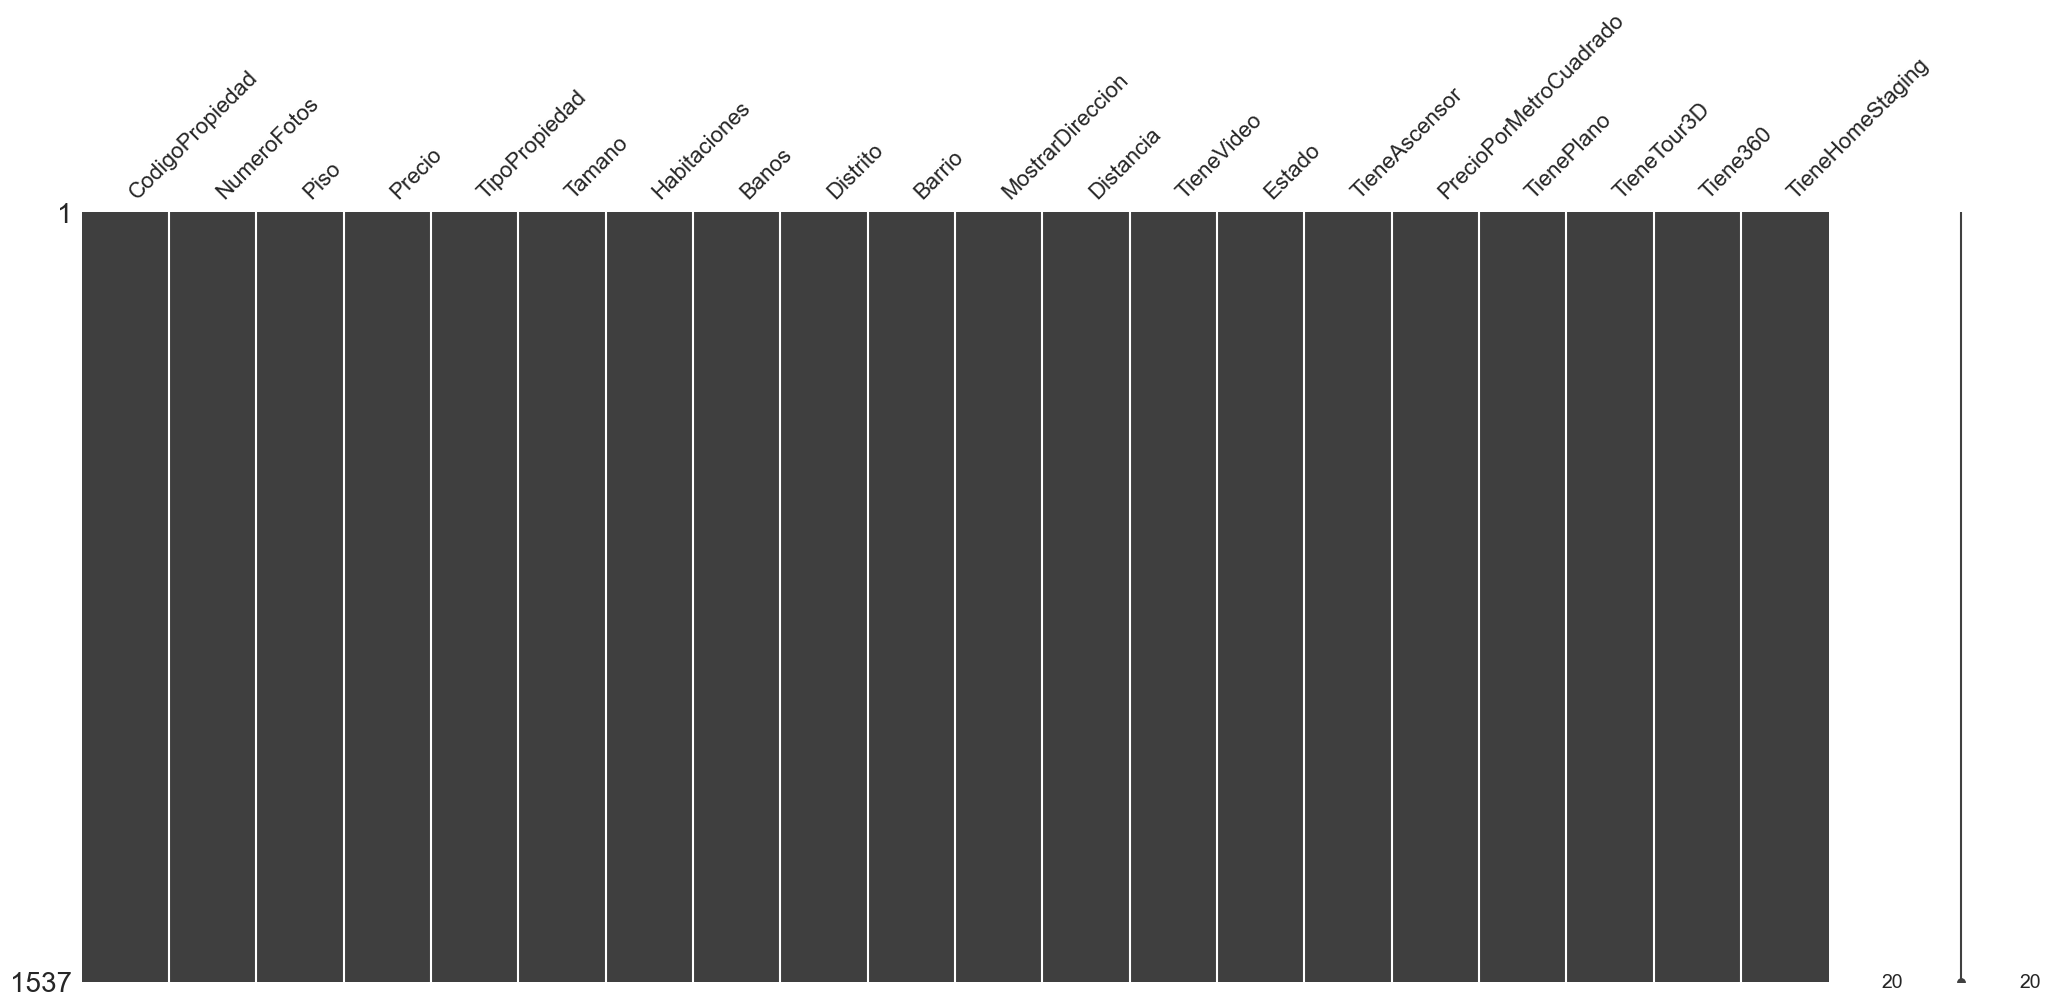

In [24]:
# tratamiendo de valores nulos

# floor
# al observar los datos en el dataset encontramos que los pisos sin datos corresponden a pisos en bajo y le daremos 
# el valor 0, asi tambien reemplazaremos los datos que corresponden a bj como 0

# exterior
# al observar los datos en el dataset encontramos que los datos faltantes corresponden a chalet o casas de campo
# por lo tanto lo cargaremos como TRUE en el dataset

# hasLift
# asumiremos que los pisos que no cuentan con valores en esta variable no cuentan con ascensor

# Rellenar valores nulos en las columnas
df['Piso'].fillna(0, inplace=True)
df['Estado'] = df['Estado'].fillna("good")
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

# Mostrar el DataFrame resultante para verificar los cambios
msno.matrix(df)

In [25]:
df.shape

(1537, 20)

In [26]:
# Reemplazar valores específicos en la columna 'Piso'
df['Piso'].replace({'bj': 0, 'en': 0, 'ss': 0, 'st': 0}, inplace=True)

# Convertir la columna 'Piso' a tipo numérico
df['Piso'] = pd.to_numeric(df['Piso'], errors='coerce').fillna(0)

# Rellenar valores nulos en otras columnas
df['Piso'].fillna(0, inplace=True)
df['TieneAscensor'].fillna(False, inplace=True)
df['Distrito'].fillna('No especifica', inplace=True)
df['Barrio'].fillna('No especifica', inplace=True)

In [27]:
# al analizar las variables encontramos que los tipos estan mal especificados
df['Piso'] = df['Piso'].astype(int)

In [28]:
import pandas as pd

# Supongamos que df es tu DataFrame y ya está cargado con los datos proporcionados

# Calcula Q1 y Q3
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)

# Calcula el IQR
IQR = Q3 - Q1

# Calcula los límites para identificar valores atípicos
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Filtra los valores atípicos
outliers = df[(df['Precio'] < lower_fence) | (df['Precio'] > upper_fence)]

# Cuenta la cantidad de valores atípicos
cantidad_outliers = len(outliers)

# Muestra la cantidad de valores atípicos
print(f'Cantidad de valores atípicos: {cantidad_outliers}')

# Opcional: Mostrar los valores atípicos
print(outliers)

Cantidad de valores atípicos: 80
      CodigoPropiedad  NumeroFotos  Piso    Precio TipoPropiedad  Tamano  \
9            88869622           80     2  668000.0          flat   260.0   
64          104067268           67     3  665000.0        duplex   246.0   
65          100585057           52     0  680000.0        chalet   249.0   
89           97820761           67     0  690000.0        chalet   239.0   
92          104999937            3     6  730000.0          flat   232.0   
...               ...          ...   ...       ...           ...     ...   
1405         97580573           14     5  599900.0          flat   243.0   
1408        104573564            6     0  748000.0          flat   321.0   
1448        103694500            7     1  698900.0          flat   200.0   
1500        102291100           13     8  748000.0          flat   321.0   
1528        105731560            0     8  598500.0          flat   321.0   

      Habitaciones  Banos         Distrito            

In [29]:
# A fin de que nos afecten menos los valores atípicos a nuestra distribución, 
# cogeremos como 350 € el tope minimo de valor de las propiedades, 
# quitando aquellas que lo superen. A continuación volveremos a ver cómo queda la distribución.

# Filtra el DataFrame para eliminar las filas donde el precio es mayor a 1,500,000
df = df[df['Precio'] <= 598500.0]

# Muestra la cantidad de filas restantes en el DataFrame
cantidad_filas = len(df)
print(f'Cantidad de filas restantes: {cantidad_filas}')

Cantidad de filas restantes: 1483


In [30]:
# Para una mejor practica realizaremos un cambio de las variables objet y bool a numericas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_transformed = df.copy()

# Convertir columnas booleanas a enteros (True -> 1, False -> 0)
bool_columns = df_transformed.select_dtypes(include=['bool']).columns
df_transformed[bool_columns] = df_transformed[bool_columns].astype(int)

# Convertir columnas de tipo object a números enteros usando LabelEncoder
object_columns = df_transformed.select_dtypes(include=['object']).columns

# Inicializar LabelEncoder
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col].astype(str))
    label_encoders[col] = le

# Mostrar el DataFrame transformado
print(df_transformed.head())

# Opcional: Guardar el DataFrame transformado a un nuevo archivo CSV
# df_transformed.to_csv('df_transformed.csv', index=False)

   CodigoPropiedad  NumeroFotos  Piso    Precio  TipoPropiedad  Tamano  \
0        105157805           67     7  250000.0              2   113.0   
1        105832061           35     3  195000.0              2    65.0   
2        105447275           50     0  220000.0              2   148.0   
3        104623253           46     2  236000.0              2   156.0   
4        105341044           31     0  160000.0              2    66.0   

   Habitaciones  Banos  Distrito  Barrio  MostrarDireccion  Distancia  \
0             4      2        14      33                 0       2517   
1             2      1        14      33                 0       1858   
2             4      2        14      33                 0       1833   
3             5      3        11      28                 0       2393   
4             2      1        11      28                 0       2100   

   TieneVideo  Estado  TieneAscensor  PrecioPorMetroCuadrado  TienePlano  \
0           1       0              1    

In [31]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, 0 to 1536
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CodigoPropiedad         1483 non-null   int64  
 1   NumeroFotos             1483 non-null   int64  
 2   Piso                    1483 non-null   int32  
 3   Precio                  1483 non-null   float64
 4   TipoPropiedad           1483 non-null   int32  
 5   Tamano                  1483 non-null   float64
 6   Habitaciones            1483 non-null   int64  
 7   Banos                   1483 non-null   int64  
 8   Distrito                1483 non-null   int32  
 9   Barrio                  1483 non-null   int32  
 10  MostrarDireccion        1483 non-null   int32  
 11  Distancia               1483 non-null   int64  
 12  TieneVideo              1483 non-null   int32  
 13  Estado                  1483 non-null   int32  
 14  TieneAscensor           1483 non-null   int32

Correlaciones significativas:
               Variable 1    Variable 2  Correlation
0                  Tamano        Precio     0.715127
2                   Banos        Precio     0.651531
1            Habitaciones        Tamano     0.628712
3                   Banos        Tamano     0.625536
5  PrecioPorMetroCuadrado        Precio     0.561161
4                   Banos  Habitaciones     0.511469


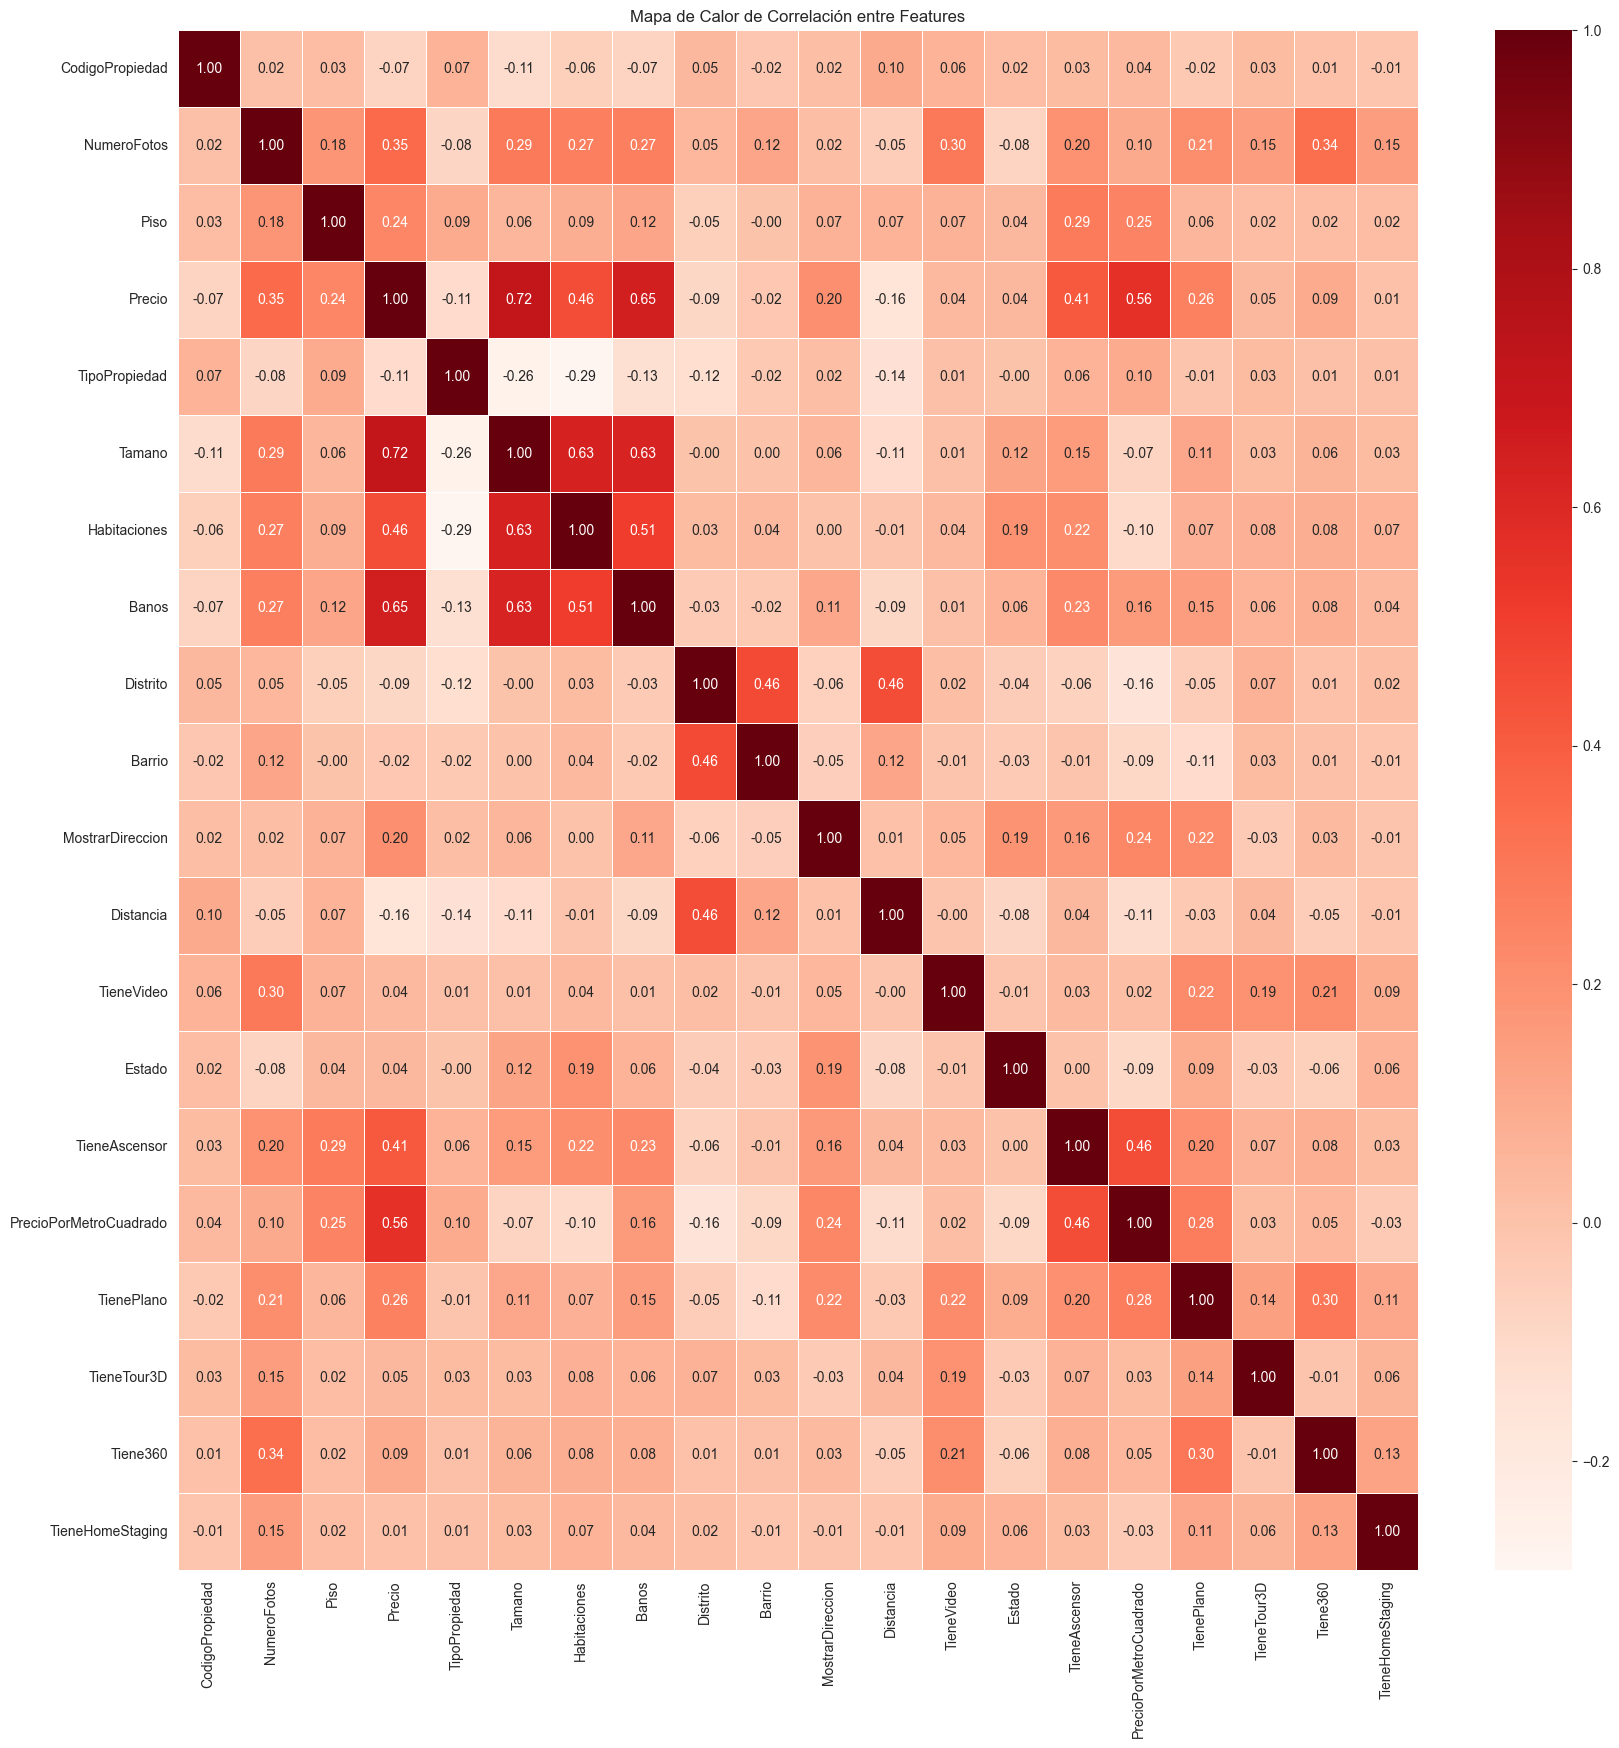

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear una lista para almacenar las correlaciones significativas
correlation_list = []

# Umbral de correlación
threshold_1 = 0.5
threshold_2 = -0.5


# Iterar sobre la matriz de correlación para encontrar correlaciones significativas
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold_1:
            correlation_list.append({
                'Variable 1': cor.columns[i],
                'Variable 2': cor.columns[j],
                'Correlation': cor.iloc[i, j]
            })

# Iterar sobre la matriz de correlación para encontrar correlaciones significativas
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) < threshold_2:
            correlation_list.append({
                'Variable 1': cor.columns[i],
                'Variable 2': cor.columns[j],
                'Correlation': cor.iloc[i, j]
            })

# Convertir la lista en un DataFrame
significant_correlations = pd.DataFrame(correlation_list)

# Mostrar las correlaciones significativas
print("Correlaciones significativas:")
print(significant_correlations.sort_values(by='Correlation', ascending=False))

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Calcular la matriz de correlación
cor = df_transformed.corr()

# Crear el mapa de calor
sns.heatmap(cor, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Features')
plt.show()

# Opcional: Guardar las correlaciones significativas en un archivo CSV
# significant_correlations.to_csv('significant_correlations.csv', index=False)
